In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

In [2]:
#############
## Part(a) ##
#############
def get_A(k):
    A = np.zeros((10, 10))
    for i in range(10):
        for j in range(10):
            if i < j:
                A[i, j] = np.exp((i+1)/(j+1))*np.cos((i+1)*(j+1))*np.sin(k)
                A[j, i] = A[i, j]
    
    for i in range(10):
        A[i, i] = ((i+1)/10)*abs(np.sin(k)) + sum([abs(A[i, j]) for j in range(10) if i!=j])
    return A

def get_b(k):
    b = np.zeros((10))
    for i in range(10):
        b[i] = np.exp((i+1)/k)*np.sin((i+1)*k)
    return b

def solve_f(x):
    k_val = []
    for i in range(5):
        k = i + 1
        A_k = get_A(k)
        b_k = get_b(k)
        f_x = x.T @ A_k @ x - b_k.T @ x
        k_val.append(f_x)
    #print("Values are", k_val)
    return max(k_val)
    

In [3]:
#############
## Part(a) ##
#############
x_1 = np.ones(10)
print("f(x1) is :", solve_f(x_1))



f(x1) is : 5337.066429311362


In [4]:
#############
## Part(b) ##
#############

def find_descent(A, b, x):
    df = 2*(A@x)-b
    df_norm = np.linalg.norm(df, 2)
    if df_norm == 0:
        converged = True
    else:
        converged = False

    return df/df_norm,converged, df_norm
    



In [9]:
import cvxpy as cvx
#############
## Part(b) ##
#############
converge = False
loss = []
ite = []
x = np.ones(10)
t = 1
C =0.08
tol = 0.00001

xs = []
A = [get_A(i+1) for i in range(5)] 
b = [get_b(i+1) for i in range(5)] 

def f(x, As = A, bs = b):

    val = [x.T @ A @ x - b.T@x for (A, b) in zip(As, bs)]
    np_val = np.array(val)
    k = np.argmax(np_val)
    
    
    return max(val), k

def df(x, A, b):
    val = (A + A.T)@x - b

    return val

def f_i(x, x_j, f = f, df = df, A = A, b = b):

    f_val, k = f(x_j)
    

    
    val = f_val + df(x_j, A[k], b[k]).T @ (x-x_j)
    
    
    return val
    
def f_i_x(f, df, x, xs):

    #val = max([f_i(x, x_j, f, df) for x_j in xs])
    
    #print([f_i(x, x_j, f, df) for x_j in xs])
    
    

    x_helper = cvx.hstack([f_i(x, x_j, f, df) for x_j in xs])
    
    
    return cvx.max(x_helper)



def min_f_i_x(f, df, xs):
    x = cvx.Variable(10)
    
    #print("I executed1")

    obj = cvx.Minimize(f_i_x(f, df, x, xs))
    constraint = [cvx.norm(x, 2)<=1]

    prob = cvx.Problem(obj, constraint)
    prob.solve()
    #print("I executed3")
    
    return obj.value
    
def min_f(xs):


    return min([f(x_j)[0] for x_j in xs])

def project(x, f, df, l_i):
    x_proj = cvx.Variable(10)
    obj = cvx.Minimize(cvx.norm(x - x_proj, 2))
    constraint = [cvx.norm(x_proj, 2)<=1, f_i_x(f, df, x_proj, xs)<=l_i]
    prob = cvx.Problem(obj, constraint)
    prob.solve()
    return x_proj.value
    
x_i = np.ones(10)
lambd = 0.1
iteration = 50
xs.append(x_i)
for i in range(iteration):

    

    f_minus = min_f_i_x(f, df, xs)
    f_plus = min_f(xs)

    
    l_i = (1-lambd) * f_minus + (lambd) * f_plus
    #print(l_i)
    x_proj = project(x_i, f, df, l_i)
    #print(x_proj)
    x_i = x_proj
    xs.append(x_i)
    #print(f(x_i)[0])
    
x_optimal = x_i
print("x optimal is:", x_optimal)





x optimal is: [-0.1242404  -0.02863066 -0.00049057  0.02455636  0.05772036 -0.28690269
  0.07659779  0.14202416  0.08202256  0.03681626]


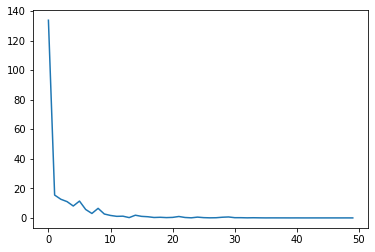

In [6]:
import cvxpy as cvx
#############
## Part(b) ##
#############
converge = False
loss = []
ite = []
x = np.ones(10)
t = 1
C =0.08
tol = 0.00001

xs = []
A = [get_A(i+1) for i in range(5)] 
b = [get_b(i+1) for i in range(5)] 

def f(x, As = A, bs = b):

    val = [x.T @ A @ x - b.T@x for (A, b) in zip(As, bs)]
    np_val = np.array(val)
    k = np.argmax(np_val)
    
    
    return max(val), k

def df(x, A, b):
    val = (A + A.T)@x - b

    return val

def f_i(x, x_j, f = f, df = df, A = A, b = b):

    f_val, k = f(x_j)
    

    
    val = f_val + df(x_j, A[k], b[k]).T @ (x-x_j)
    
    
    return val
    
def f_i_x(f, df, x, xs):

    #val = max([f_i(x, x_j, f, df) for x_j in xs])
    
    #print([f_i(x, x_j, f, df) for x_j in xs])
    
    

    x_helper = cvx.hstack([f_i(x, x_j, f, df) for x_j in xs])
    
    
    return cvx.max(x_helper)



def min_f_i_x(f, df, xs):
    x = cvx.Variable(10)
    
    #print("I executed1")

    obj = cvx.Minimize(f_i_x(f, df, x, xs))
    constraint = [cvx.norm(x, 2)<=1]

    prob = cvx.Problem(obj, constraint)
    prob.solve()
    #print("I executed3")
    
    return obj.value
    
def min_f(xs):


    return min([f(x_j)[0] for x_j in xs])

def project(x, f, df, l_i):
    x_proj = cvx.Variable(10)
    obj = cvx.Minimize(cvx.norm(x - x_proj, 2))
    constraint = [cvx.norm(x_proj, 2)<=1, f_i_x(f, df, x_proj, xs)<=l_i]
    prob = cvx.Problem(obj, constraint)
    prob.solve()
    return x_proj.value
    
x_i = np.ones(10)
lambd = 0.1
iteration = 50
xs.append(x_i)
gap = []
for i in range(iteration):

    

    f_minus = min_f_i_x(f, df, xs)
    f_plus = min_f(xs)
    #print(f_minus, f_plus)

    
    l_i = (1-lambd) * f_minus + (lambd) * f_plus
    #print(l_i)
    x_proj = project(x_i, f, df, l_i)
    #print(x_proj)
    x_i = x_proj
    xs.append(x_i)
    gap.append(abs(f(x_i)[0] - f(x_optimal)[0]))
    
ite = np.arange(iteration)   
plt.plot(ite, gap)
plt.show()


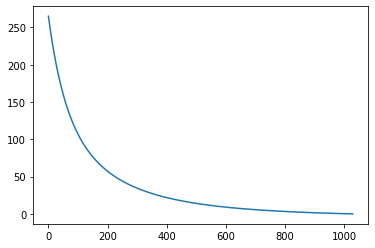

In [54]:
################
## Question 2 ##
################

############
## Part A ##
############

A  = np.random.normal(size = (20, 20))
x = np.ones(20)
iteration = 0
converged = False
step_size = 0.0001
tol = 0.001
val = []

def f(A, x):
    return x.T@A.T@A@x

while not converged:
    
    
    val.append(f(A, x))
    iteration += 1
    x_next = x - step_size * (2*A.T@A@x)
    
    
    if np.linalg.norm(x_next-x, 2)<=tol:
        converged = True
    x = x_next

plt.plot(np.arange(iteration), np.array(val) - val[-1])
plt.show()



270.29725673318575
1.1529752377372777
0.011006434023683526
0.00012842859258090035
1.612108033312703e-06


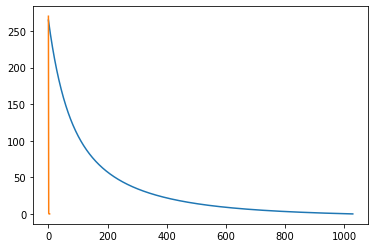

In [55]:
############
## Part B ##
############


x = np.ones(20)
z = x
#lambd = 1
gamma_lst = []
gamma = 1
lambd = 1
iteration_agd = 0
converged = False
step_size = 0.001
tol = 0.001
val_agd = []
step_size = 0.001

def f(A, x):
    return x.T@A.T@A@x

def f_inner(x, dy):
    return x.T@dy

def min_f_i_x(f_inner, dy, y):
    x = cvx.Variable(20)
    
    #print("I executed1")

    obj = cvx.Minimize(f_inner(x, dy) + (1/2)*cvx.square(cvx.norm(x - y, 2)))
    #constraint = [cvx.norm(x, 2)<=1]

    prob = cvx.Problem(obj)
    prob.solve()
    #print("I executed3")
    
    return x.value

"""
while not converged:
    if iteration>3:
        lambd, gamma = 6/(iteration*(iteration-1)), 2/iteration
    y = step_size * ((1-gamma)*x + gamma_lst[-1]*z)
    z = step_size * (z - gamma)/lambd * (2*A.T@A@y))
    x = y - 2*A.T@A@y
    
"""

while not converged:
    if iteration<=4:
        gamma_lst.append(0)
    else:
        gamma_lst.append(2/iteration)
        
    lambd = 1
    for gamma in gamma_lst:
        lambd *= (1-gamma)
        
        
    y = step_size * ((1-gamma_lst[-1])*x + gamma_lst[-1]*z)
    
    z = step_size * (z - (gamma_lst[-1])/lambd * (2*A.T@A@y))
    
    #print(2*A.T@A@y)
    
    #x_tilde = (1/4)*np.linalg.inv(A.T@A)
    
    
    #print(y)
    x_next = y-2*A.T@A@y
    #x_next = x_tilde + (1/2)*np.linalg.norm(x_tilde-y, 2)**2
    
    
    val_agd.append(f(A, x))
    #print(f(A, x))
    iteration_agd += 1

    
    if np.linalg.norm(x_next-x, 2)<=tol:
        converged = True
    x = x_next


plt.plot(np.arange(iteration), np.array(val) - val[-1])
plt.plot(np.arange(iteration_agd), np.array(val_agd) - val_agd[-1])
plt.show()


In [37]:
def f_test(A, x, y):
    return (2*A.T@A@y).T@x + (1/2)*(x-y).T@(x-y)
x = np.ones(20)
f_test(A, x, x)

808.6171967568695

In [48]:
x_next = x-2*A.T@A@x 
f_test(A, x_next, x)

-27801.12893446809

In [49]:
f(A, x)

404.30859837843474

In [50]:
f(A, x_next)

2412099.202421182